# EDA STROKE ICTUS

### ESTUDIO DE ICTUS 

In [1]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./stroke_dataset.csv"
#===============================================
# Importamos el dataset
df = pd.read_csv(path_to_data)

#### VARIABLES DECLARADAS
<ul><li><b>gender</b> : género
<li><b>age</b> : edad</li>
<li><b>hypertension</b> : hipertensión</li>
<li><b>heart_disease</b> : enfermo del corazón</li>
<li><b>ever_married</b> : alguna vez casada</li>
<li><b>work_type</b> : funcionaria, autónoma, empresa privada, niños </li>
<li><b>Residence_type</b> : Tipo de residencia, rural o urbano</li>
<li><b>avg_glucose_level</b> : porcentaje de glucosa </li> 
<li><b>bmi</b> : índice de masa corporal.</li>
<li><b>smoking_status</b> : hábito de fumar</li> 
<li><b>stroke</b> : ictus</li>
</ul>    

In [3]:
# VISUALIZAMOS LAS 5 PRIMERAS FILAS
#===============================================
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# VISUALIZAMOS LAS 5 ÚLTIMAS FILAS
#===============================================
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
#CONTAMOS FILAS Y COLUMNAS
#===============================================
df.shape

(4981, 11)

##### 4981 FILAS y 11 COLUMNAS

In [6]:
# INFORMACIÓN DEL DATASET 
#===============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## OJO!!! 

In [7]:
# PASAMOS A BOLEANOS LAS SIGUIENTES VARIABLES PARA MEJOR TRATAMIENTO DE LOS DATOS
# =============================================
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)
# OTRA FORMA DE HACERLO QUE DEBERÍA FUNCIONAR TAMBIÉN 
# =============================================
# df[["stroke", "hypertension", "heart_disease"]].astype(bool)

In [8]:
#Convertimos ever_married en booleana
#Primero cambiamos Yes y No a TRue y False
d = {'Yes': True, 'No': False}
df['ever_married']=df['ever_married'].map(d)

In [9]:
df["ever_married"] = df["ever_married"].astype(bool)

In [10]:
#Convertimos gender en booleana
#Primero cambiamos Yes y No a TRue y False
dd = {'Male': True, 'Female': False}
df['gender']=df['gender'].map(dd)

In [11]:
df["gender"] = df["gender"].astype(bool)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   bool   
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   bool   
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(5), float64(3), object(3)
memory usage: 257.9+ KB


## Balanceo de variable Target

In [13]:
# PARA VER BALANCEO DE LA VARIABLE TARGET STROKE
df["stroke"].value_counts()

False    4733
True      248
Name: stroke, dtype: int64

<AxesSubplot:ylabel='stroke'>

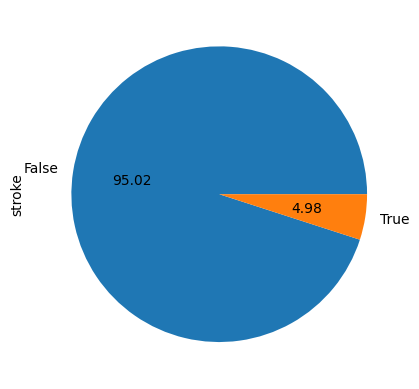

In [51]:
df["stroke"].value_counts().plot.pie(autopct = '%.2f')

##### LA VARIABLE ESTÁ MUY DESEQUILIBRADA

In [14]:
#VISUALIZACIÓN DE NULOS TOTALES EN CADA VARIABLE
#===============================================
df.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### NI UN SOLO VALOR PERDIDO

In [15]:
# ANÁLISIS ESTADÍSTICO BÁSICO
#===============================================
df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [ ]:
categoricass = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease", "stroke"]
numericass = ["age", "avg_glucose_level", "bmi"]

Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [16]:
df[categoricass].describe()

NameError: name 'categoricas' is not defined

In [17]:
#CONTEO DE VALORES EN LAS VARIABLES CATEGÓRICAS
#===============================================
for col in categoricass:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

NameError: name 'categoricas' is not defined

In [18]:
#DATOS DUPLICADOS 
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

<h2> GRÁFICOS RELEVANTES</h2>
    

In [19]:
#PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES
#===============================================
pd.plotting.scatter_matrix(df[numericass], figsize=(12,10))

NameError: name 'numericas' is not defined

In [ ]:
 df.corr()

<AxesSubplot:>

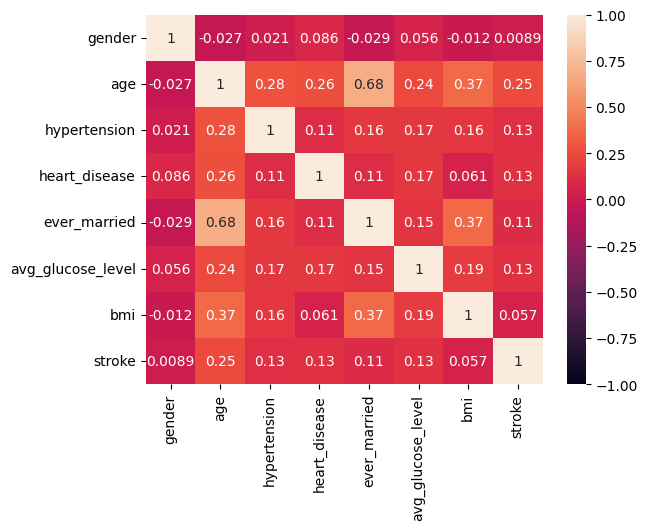

In [20]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
#===============================================
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

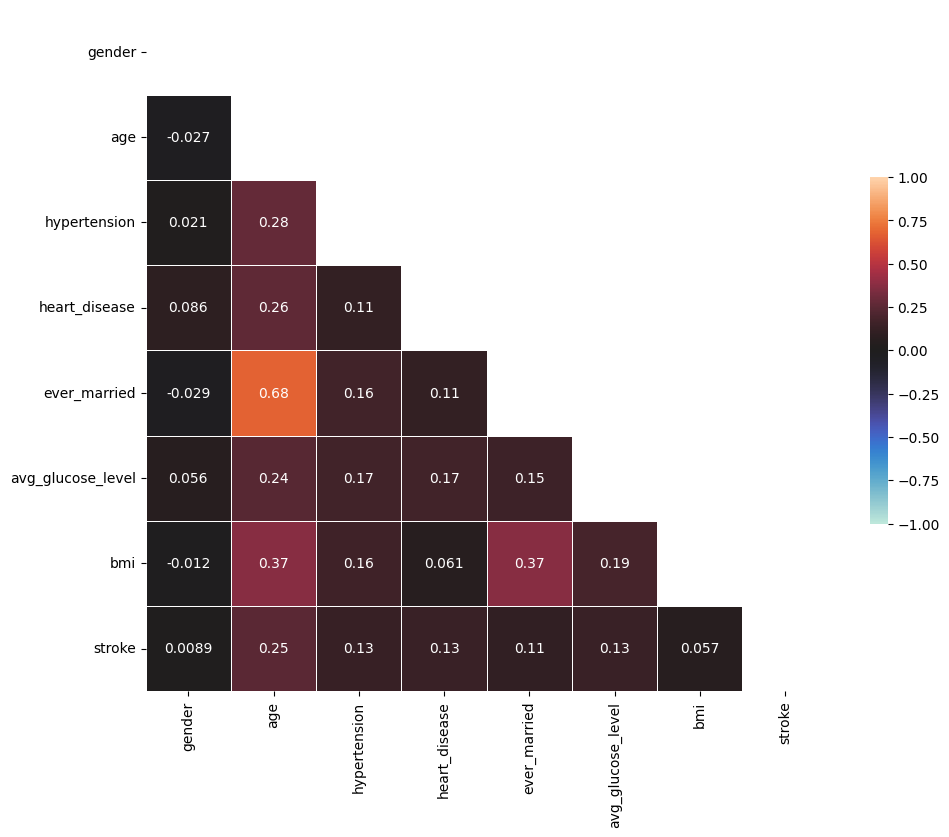

In [21]:
# Ahora igual pero más bonito
#===========================================================================
# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### BAJA CORRELACIÓN ENTRE LAS VARIABLES COMO TAMBIÉN HABÍAMOS APRECIADO EN LA TABLA Y GRÁFICO ANTERIOR.

In [22]:
# HISTOGRAMAS DE LAS VARIABLES NUMÉRICAS PARA VER SUS DISTRIBUCIONES
df[numericass].hist(bins=50, figsize=(20,15))

NameError: name 'numericas' is not defined

##### LAS VARIABLES AGE, AVG_GLUCOSE_LEVEL Y BMI TIENEN DISTRIBUCIONES NORMALES

<AxesSubplot:xlabel='age', ylabel='Count'>

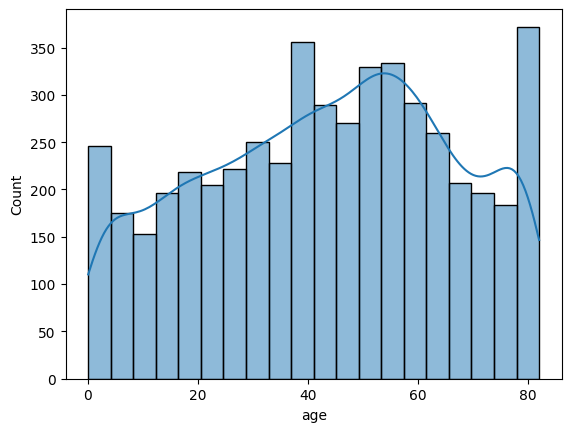

In [23]:
sns.histplot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

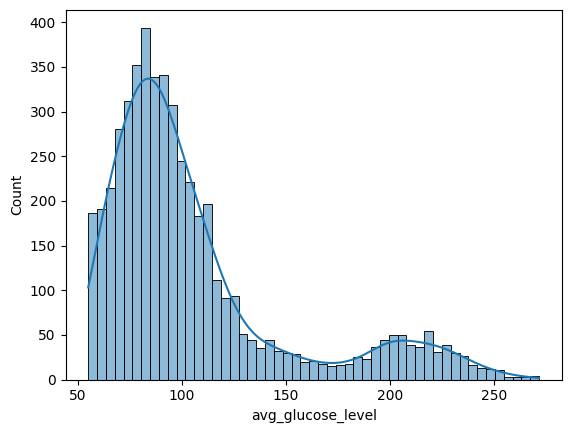

In [24]:
sns.histplot(data=df, x="avg_glucose_level", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

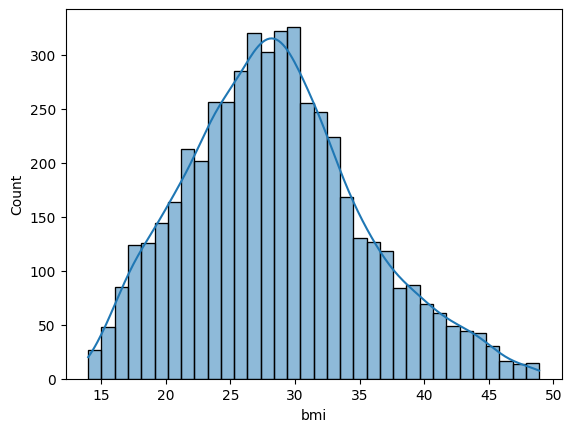

In [25]:
sns.histplot(data=df, x="bmi", kde=True)

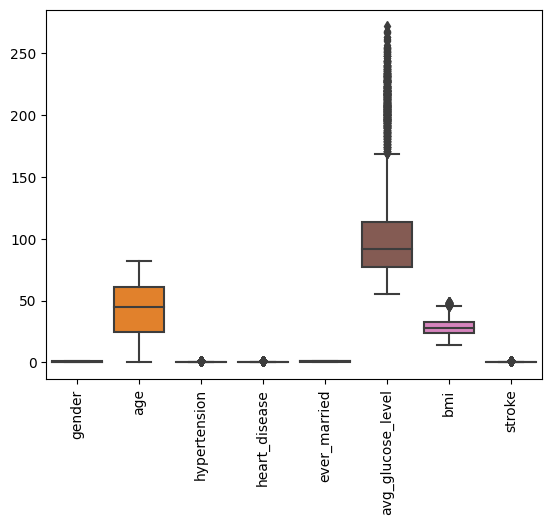

In [26]:
# Observamos los outlers de las variables numéricas
# =======================================================
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [27]:
#Comprobar cuántos valores perdemos si nos quedamos con menores de 45 en bmi
# ===================================================================
len(df[df["bmi"]>45])

65

<AxesSubplot:xlabel='bmi', ylabel='age'>

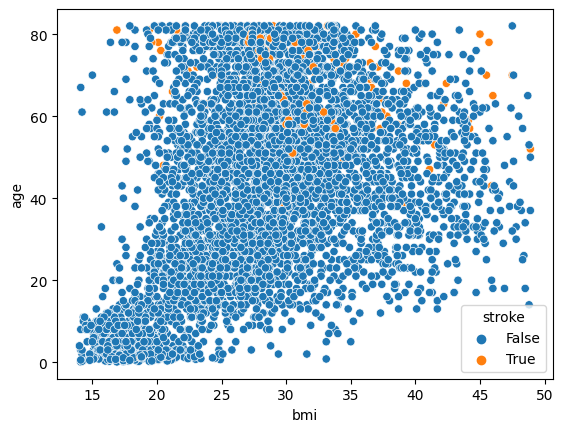

In [28]:
# VISUALIZAMOS LAS VARIABLES
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

## OJO!!!! REVISAR ESTA VARIABLE POR SI EL MODELO NO FUESE CORRECTO

<AxesSubplot:xlabel='bmi'>

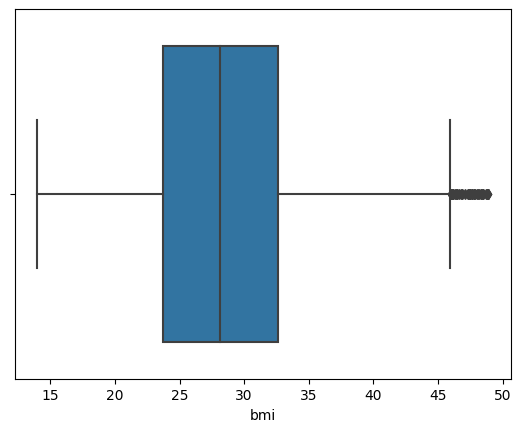

In [29]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
df["bmi"].skew()
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='age'>

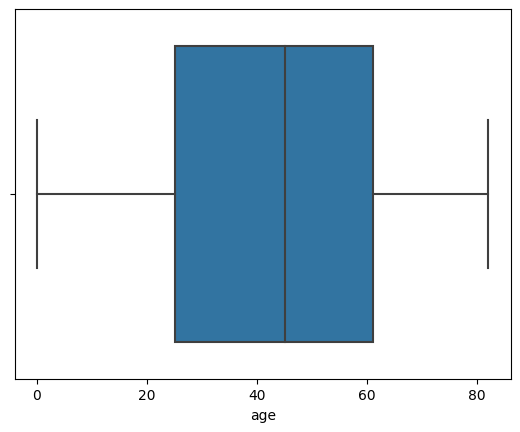

In [30]:
# VISUALIZACIÓN DE LA VARIABLE AGE
# =======================================================
df["age"].skew()
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='avg_glucose_level'>

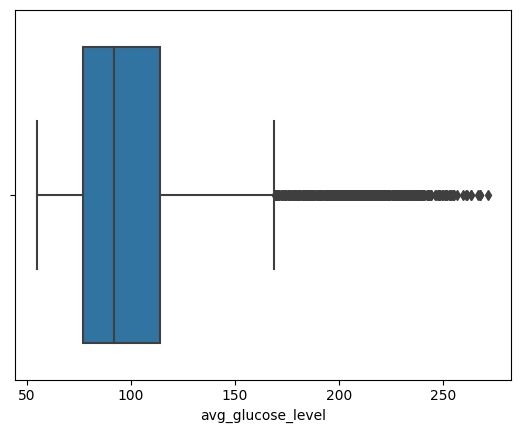

In [31]:
# VISUALIZACIÓN DE LA VARIABLE avg_glucose_level
# =======================================================
df["avg_glucose_level"].skew()
sns.boxplot(x=df["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

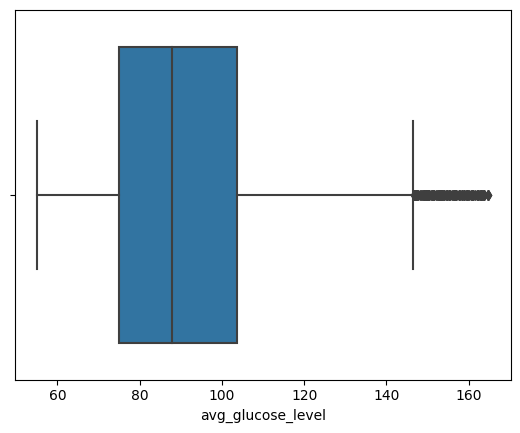

In [32]:
sns.boxplot(x= df[(df["avg_glucose_level"]<165 )]["avg_glucose_level"])

## INGENIERÍA DE CARACTERÍSTICAS

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

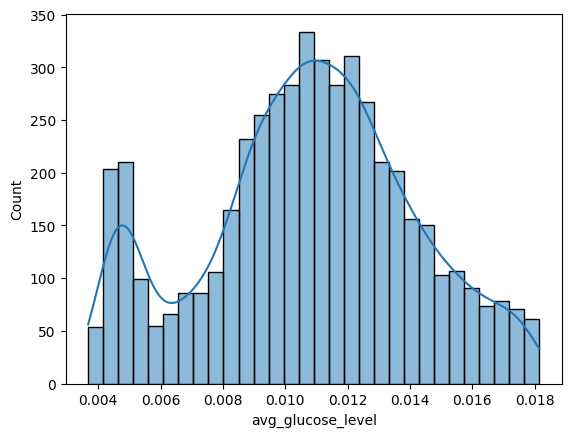

In [33]:
reciprocal_avg_glucose_level = 1/df["avg_glucose_level"]
df["reciprocal_avg_glucose_level"] = reciprocal_avg_glucose_level
sns.histplot(x=reciprocal_avg_glucose_level, kde=True)

((array([-3.63470665, -3.39932754, -3.26959543, ...,  3.26959543,
          3.39932754,  3.63470665]),
  array([0.00367999, 0.00373469, 0.00373678, ..., 0.0181061 , 0.01810938,
         0.01814224])),
 (0.0033355025567940624, 0.010750946955177384, 0.990625613792121))

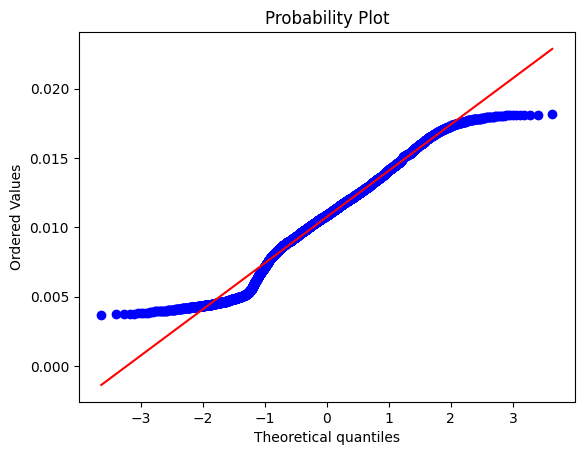

In [34]:
stats.probplot(reciprocal_avg_glucose_level, plot=pylab)

In [35]:
df=df.drop(['avg_glucose_level'], axis=1)

# Random Undersampling

In [52]:
from imblearn.under_sampling import RandomUnderSampler

ModuleNotFoundError: No module named 'imblearn'

# Preparación

In [36]:
#Separamos la variable a predecir "price" estan separadas pero siguen linkadas por el índice
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [41]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
numericas = ["age", "reciprocal_avg_glucose_level", "bmi"]

In [42]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,reciprocal_avg_glucose_level
0,True,67.0,False,True,True,Private,Urban,36.6,formerly smoked,True,0.004373
1,True,80.0,False,True,True,Private,Rural,32.5,never smoked,True,0.009441
2,False,49.0,False,False,True,Private,Urban,34.4,smokes,True,0.005840
3,False,79.0,True,False,True,Self-employed,Rural,24.0,never smoked,True,0.005743
4,True,81.0,False,False,True,Private,Urban,29.0,formerly smoked,True,0.005370
...,...,...,...,...,...,...,...,...,...,...,...
4976,True,41.0,False,False,False,Private,Rural,29.8,formerly smoked,False,0.014255
4977,True,40.0,False,False,True,Private,Urban,31.1,smokes,False,0.005231
4978,False,45.0,True,False,True,Govt_job,Rural,31.8,smokes,False,0.010524
4979,True,40.0,False,False,True,Private,Rural,30.0,smokes,False,0.011913


In [43]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

In [44]:
X = transformer.fit_transform(X)

In [45]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__reciprocal_avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_False,transformer_categorico__gender_True,transformer_categorico__ever_married_False,transformer_categorico__ever_married_True,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,...,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__hypertension_False,transformer_categorico__hypertension_True,transformer_categorico__heart_disease_False,transformer_categorico__heart_disease_True
0,0.816895,0.047900,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.975586,0.398354,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.597168,0.149362,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.963379,0.142660,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.987793,0.116876,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.731227,0.452722,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4977,0.487305,0.107280,0.489971,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4978,0.548340,0.473240,0.510029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4979,0.487305,0.569295,0.458453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Entrenamiento

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [47]:
#Algoritmos de clasificación

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
#Métricas de los algoritmos

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [49]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo()
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    confusionmatrix = confusion_matrix(y_test, y_predict)
    
    y_pred_train = mod.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    confusionmatrix_train = confusion_matrix(y_train, y_pred_train)
    
    print(nombre_modelo)
    print()
    print(f"Accuracy: {accuracy}")
    print(f"RocAUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"ConfusionMatrix: {confusionmatrix}")
    print()  
    
    print(nombre_modelo)
    print()
    print(f"Accuracy_train: {accuracy_train}")
    print(f"RocAUC_train: {auc_train}")
    print(f"Recall_train: {recall_train}")
    print(f"Precision_train: {precision_train}")
    print(f"ConfusionMatrix_train: {confusionmatrix_train}")
    print() 

In [50]:
train_evaluate("RandomForestClassifier", RandomForestClassifier)

RandomForestClassifier

Accuracy: 0.9431438127090301
RocAUC: 0.49752999294283695
Recall: 0.0
Precision: 0.0
ConfusionMatrix: [[1410    7]
 [  78    0]]

RandomForestClassifier

Accuracy_train: 1.0
RocAUC_train: 1.0
Recall_train: 1.0
Precision_train: 1.0
ConfusionMatrix_train: [[3316    0]
 [   0  170]]

